# Effect of underresolved meshes on species boundary layers

This notebook highlights the effect of low mesh resolution on diffusive fluxes, convective fluxes, and source terms due to reactions in a standard finite volume discretization of reactive species boundary layers. To obtain realistic profiles, a coupled system of 1D reaction-diffusion equations is solved.

## Dependencies

This notebook has no dependencies to other notebooks or to the data set.

## Mathematical problem

We are looking at a single reaction of type $2A+B\rightarrow P$, where the transfer species $A$ reacts with some bulk component $B$ to the desired product $P$. The reaction-diffusion equations for such a system read
$$
\frac{\mathrm{d}^2 c_A}{\mathrm{d}x^2} = 2k c_A^2 c_B\\
\frac{\mathrm{d}^2 c_B}{\mathrm{d}x^2} = k c_A^2 c_B\\
\frac{\mathrm{d}^2 c_P}{\mathrm{d}x^2} = -k c_A^2 c_B
$$

where $k$ denotes the reaction rate constant. The boundary conditions for $A$ for a domain of length $L$ are $c_A|_{x=0} = 1$ and $c_A|_{x=L} = 0$. The boundary at $x=0$ may be considered as the gas-liquid interface. For species $B$, the gradient at $x=0$ is set to zero, e.g. no flux of $B$ passes the interface, and at $x=L$ a fixed value is applied, e.g. the bulk is always saturated with $B$. Expressed in mathematical terms the same condtions read
$$
\left.\frac{\mathrm{d} c_B}{\mathrm{d}x}\right\vert_{x=0} = 0\quad \text{and} \quad c_B|_{x=L} = 1.
$$

For the product species, at both boundaries the concentration value is set to zero. For $P$ there are several sensible boundary conditions, but the chosen ones are sufficient to create a realistic profile.

## Solving a single boundary value problem using SciPy

In [1]:
import helper_module as hm
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import solve_bvp
import numpy as np

%matplotlib inline
rc('text', usetex=True)

def func(x, c):
    source = 1000*np.power(c[0], 2)*c[2]
    return np.vstack((c[1], 2*source, c[3], source, c[5], -source))

def bc(c_a, c_b):
    return np.array([c_a[0] - 1.0, c_a[3], c_a[4], c_b[0], c_b[2] - 1.0, c_b[4]])

x = np.linspace(0, 1.0, 20)
c_init = np.zeros((6, x.size))
res = solve_bvp(func, bc, x, c_init)

x_plot = np.linspace(0, 1, 100)
y_plot_a = res.sol(x_plot)[0] # species A
y_plot_b = res.sol(x_plot)[2] # species B
y_plot_p = res.sol(x_plot)[4] # species P

## Plot results and visualize consequences

In [2]:
def set_common_features(axis):
    axis.set_xlabel(r"$x/\delta_c$", fontsize=hm.fontsize_label)
    axis.tick_params(labelsize=hm.fontsize_tick)
    axis.set_xlim([0.0, 1.0])
    axis.set_ylim([0.0, 1.0])
    axis.text(0.2, 0.9, r"cell 1", fontsize=hm.fontsize_legend)
    axis.text(0.7, 0.9, r"cell 2", fontsize=hm.fontsize_legend)
    axis.text(0.465, 0.85, r"cell face 1/2", rotation='vertical', fontsize=hm.fontsize_legend)
    axis.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)

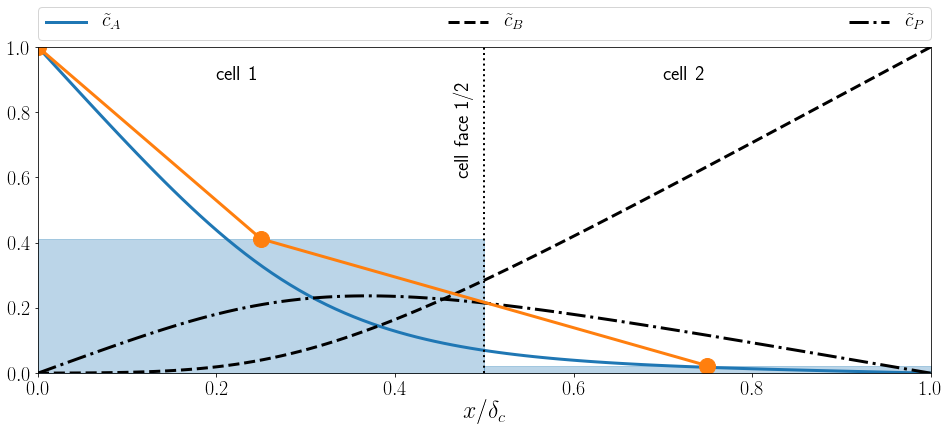

In [3]:
# transfer species
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

alpha = 0.3
lw = hm.line_width

# simple approximation of cell average
av_cell_1 = np.sum(res.sol(x_plot)[0][0:50]) / 50
av_cell_2 = np.sum(res.sol(x_plot)[0][50:]) / 50

ax.fill_between([0, 0.5], [0.0, 0.0], [av_cell_1, av_cell_1], color="C0", alpha=alpha)
ax.fill_between([0.5, 1.0], [0.0, 0.0], [av_cell_2, av_cell_2], color="C0", alpha=alpha)
ax.plot(x_plot, y_plot_a, ls='-', c='C0', linewidth=lw, label=r"$\tilde{c}_A$")
ax.plot(x_plot, y_plot_b, ls='--', c='k', linewidth=lw, label=r"$\tilde{c}_B$")
ax.plot(x_plot, y_plot_p, ls='-.', c='k', linewidth=lw, label=r"$\tilde{c}_P$")
ax.axvline(0.5, 0, 1, linestyle=':', color='k', lw=2)
ax.plot([0.0, 0.25, 0.75], [1.0, av_cell_1, av_cell_2], c='C1', linewidth=lw, marker="o", ms=16)
set_common_features(ax)

plt.savefig("../output/sgs_flux_A.pdf", bbox_inches='tight')
plt.savefig("../output/sgs_flux_A.png", bbox_inches='tight')

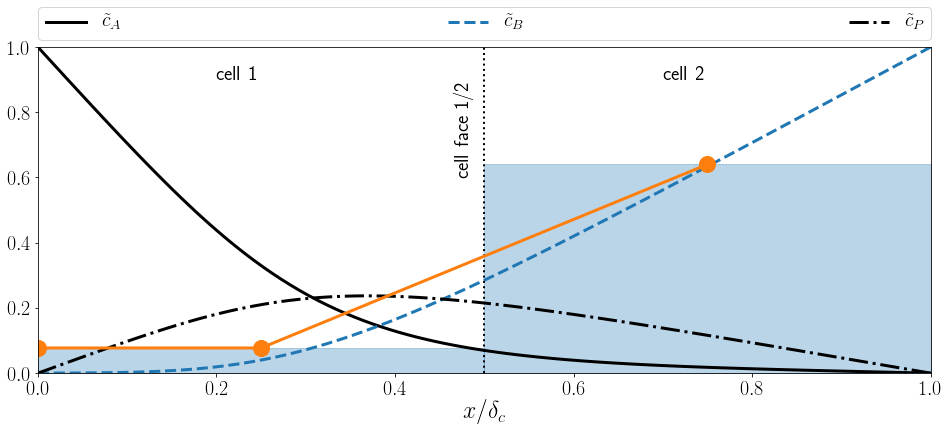

In [4]:
# bulk species
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

# simple approximation of cell average
av_cell_1 = np.sum(res.sol(x_plot)[2][0:50]) / 50
av_cell_2 = np.sum(res.sol(x_plot)[2][50:]) / 50

ax.fill_between([0, 0.5], [0.0, 0.0], [av_cell_1, av_cell_1], color="C0", alpha=alpha)
ax.fill_between([0.5, 1.0], [0.0, 0.0], [av_cell_2, av_cell_2], color="C0", alpha=alpha)
ax.plot(x_plot, y_plot_a, ls='-', c='k', linewidth=lw, label=r"$\tilde{c}_A$")
ax.plot(x_plot, y_plot_b, ls='--', c='C0', linewidth=lw, label=r"$\tilde{c}_B$")
ax.plot(x_plot, y_plot_p, ls='-.', c='k', linewidth=lw, label=r"$\tilde{c}_P$")
ax.axvline(0.5, 0, 1, linestyle=':', color='k', lw=2)
ax.plot([0.0, 0.25, 0.75], [av_cell_1, av_cell_1, av_cell_2], c='C1', linewidth=lw, marker="o", ms=16)
set_common_features(ax)

plt.savefig("../output/sgs_flux_B.pdf", bbox_inches='tight')
plt.savefig("../output/sgs_flux_B.png", bbox_inches='tight')

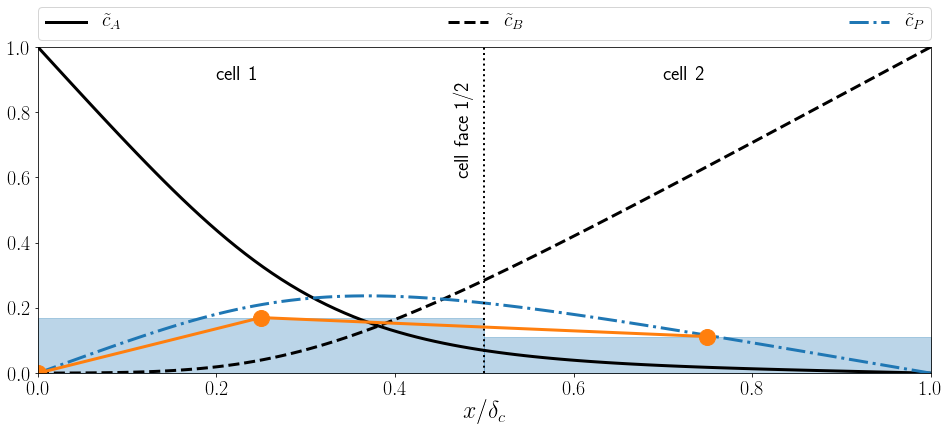

In [5]:
# product species
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

# simple approximation of cell average
av_cell_1 = np.sum(res.sol(x_plot)[4][0:50]) / 50
av_cell_2 = np.sum(res.sol(x_plot)[4][50:]) / 50

ax.fill_between([0, 0.5], [0.0, 0.0], [av_cell_1, av_cell_1], color="C0", alpha=alpha)
ax.fill_between([0.5, 1.0], [0.0, 0.0], [av_cell_2, av_cell_2], color="C0", alpha=alpha)
ax.plot(x_plot, y_plot_a, ls='-', c='k', linewidth=lw, label=r"$\tilde{c}_A$")
ax.plot(x_plot, y_plot_b, ls='--', c='k', linewidth=lw, label=r"$\tilde{c}_B$")
ax.plot(x_plot, y_plot_p, ls='-.', c='C0', linewidth=lw, label=r"$\tilde{c}_P$")
ax.axvline(0.5, 0, 1, linestyle=':', color='k', lw=2)
ax.plot([0.0, 0.25, 0.75], [0.0, av_cell_1, av_cell_2], c='C1', linewidth=lw, marker="o", ms=16)
set_common_features(ax)

plt.savefig("../output/sgs_flux_P.pdf", bbox_inches='tight')
plt.savefig("../output/sgs_flux_P.png", bbox_inches='tight')

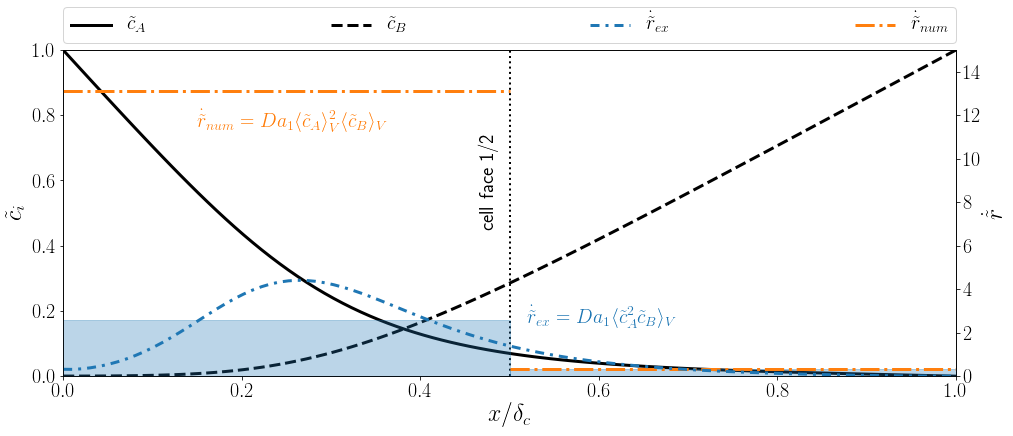

In [6]:
# reaction source term
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))
axt = ax.twinx()

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

# approximate average source term from ODE solution
source = 1000 * np.power(y_plot_a, 2) * y_plot_b
av_cell_1 = np.sum(source[0:50]) / 50
av_cell_2 = np.sum(source[50:]) / 50
axt.fill_between([0, 0.5], [0.0, 0.0], [av_cell_1, av_cell_1], color="C0", alpha=alpha)
axt.fill_between([0.5, 1.0], [0.0, 0.0], [av_cell_2, av_cell_2], color="C0", alpha=alpha)

# approximate average source term from concentration averages
av_cell_1_A = np.sum(res.sol(x_plot)[0][0:50]) / 50
av_cell_2_A = np.sum(res.sol(x_plot)[0][50:]) / 50
av_cell_1_B = np.sum(res.sol(x_plot)[2][0:50]) / 50
av_cell_2_B = np.sum(res.sol(x_plot)[2][50:]) / 50
source_lin_1 = 1000 * av_cell_1_A**2 * av_cell_1_B
source_lin_2 = 1000 * av_cell_2_A**2 * av_cell_2_B
axt.axhline(source_lin_1, 0, 0.5, linestyle='-.', color='C1', lw=lw)
axt.axhline(source_lin_2, 0.5, 1.0, linestyle='-.', color='C1', lw=lw)

ax.plot(x_plot, y_plot_a, ls='-', c='k', linewidth=lw, label=r"$\tilde{c}_A$")
ax.plot(x_plot, y_plot_b, ls='--', c='k', linewidth=lw, label=r"$\tilde{c}_B$")
ax.plot([], [], ls='-.', c='C0', dashes=[3, 2, 1, 2], linewidth=lw, label=r"$\dot{\tilde{r}}_{ex}$")
ax.plot([], [], ls='-.', c='C1', linewidth=lw, label=r"$\dot{\tilde{r}}_{num}$")

axt.plot(x_plot, source, ls='-.', dashes=[3, 2, 1, 2], c='C0', linewidth=lw)

ax.axvline(0.5, 0, 1, linestyle=':', color='k', lw=2)

ax.set_xlabel(r"$x/\delta_c$", fontsize=hm.fontsize_label)
ax.set_ylabel(r"$\tilde{c}_i$", fontsize=hm.fontsize_label)
axt.set_ylabel(r"$\dot{\tilde{r}}$", fontsize=hm.fontsize_label)
ax.text(0.15, 0.75, r"$\dot{\tilde{r}}_{num} = Da_1\langle \tilde{c}_A \rangle_V^2\langle \tilde{c}_B \rangle_V$",
        fontsize=hm.fontsize_legend, color='C1')
ax.text(0.52, 0.15, r"$\dot{\tilde{r}}_{ex} = Da_1\langle \tilde{c}_A^2 \tilde{c}_B \rangle_V$",
        fontsize=hm.fontsize_legend, color='C0')
ax.text(0.465, 0.7, r"cell face 1/2", rotation='vertical', fontsize=hm.fontsize_legend)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
axt.set_ylim([0.0, 15.0])
ax.tick_params(labelsize=hm.fontsize_tick)
axt.tick_params(labelsize=hm.fontsize_tick)
align_yaxis(ax, 0.0, axt, 0.0)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)

plt.savefig("../output/sgs_source_term.pdf", bbox_inches='tight')
plt.savefig("../output/sgs_source_term.png", bbox_inches='tight')